In [102]:
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')

google_drive_folder = "/content/drive/My Drive/ML CW/Data"

# file paths
file_name = os.path.join(google_drive_folder, "bank-additional-full.csv")
output_file = os.path.join(google_drive_folder, "cleaned_file.csv")

# Checking if the file exists in the current directory
if os.path.isfile(file_name):
    print(f"'{file_name}' found. Loading file...")

    # Loading the CSV file
    data = pd.read_csv(file_name, header=None)

    # Checking the first few rows to confirm the data format
    print("Raw data preview:")
    print(data.head())

    ## Data Cleaning

    # Splitting the single column into multiple columns based on semicolons
    data_split = data[0].str.split(';', expand=True)

    # Removing double quotes from string values
    data_cleaned = data_split.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

    # Display the cleaned data
    print("\nCleaned data preview:")
    print(data_cleaned.head())

    # Separate the first two rows
    first_two_rows = data_cleaned.iloc[:2]

    # Shuffle the rest of the rows
    shuffled_rest = data_cleaned.iloc[2:].sample(frac=1, random_state=42).reset_index(drop=True)

    # Concatenate the fixed rows with the shuffled rows
    data_shuffled = pd.concat([first_two_rows, shuffled_rest], ignore_index=True)

    # Display the shuffled data
    print("\nShuffled data preview:")
    print(data_shuffled.head())

    # Save the processed dataset to Google Drive
    data_shuffled.to_csv(output_file, index=False)
    print(f"\nShuffled and cleaned data saved to: {output_file}")

else:
    print(f"Error: '{file_name}' not found in the current directory.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/ML CW/Data/bank-additional-full.csv' found. Loading file...
Raw data preview:
                                                   0
0  age;"job";"marital";"education";"default";"hou...
1  56;"housemaid";"married";"basic.4y";"no";"no";...
2  57;"services";"married";"high.school";"unknown...
3  37;"services";"married";"high.school";"no";"ye...
4  40;"admin.";"married";"basic.6y";"no";"no";"no...


<ipython-input-102-a479f5d4bfb4>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_cleaned = data_split.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)



Cleaned data preview:
    0          1        2            3        4        5     6          7   \
0  age        job  marital    education  default  housing  loan    contact   
1   56  housemaid  married     basic.4y       no       no    no  telephone   
2   57   services  married  high.school  unknown       no    no  telephone   
3   37   services  married  high.school       no      yes    no  telephone   
4   40     admin.  married     basic.6y       no       no    no  telephone   

      8            9   ...        11     12        13           14  \
0  month  day_of_week  ...  campaign  pdays  previous     poutcome   
1    may          mon  ...         1    999         0  nonexistent   
2    may          mon  ...         1    999         0  nonexistent   
3    may          mon  ...         1    999         0  nonexistent   
4    may          mon  ...         1    999         0  nonexistent   

             15              16             17         18           19  20  
0  emp.var

In [103]:
# Replacing 'unknown' with NaN in the entire dataframe
data_shuffled.replace('unknown', pd.NA, inplace=True)

# Displaying the cleaned data
print(data_shuffled.head())

output_file = os.path.join(google_drive_folder, "cleaned_with_na.csv")
data_shuffled.to_csv(output_file, index=False)
print(f"\nCleaned data saved to: {output_file}")


    0              1        2                  3        4        5     6   \
0  age            job  marital          education  default  housing  loan   
1   56      housemaid  married           basic.4y       no       no    no   
2   34     technician   single  university.degree       no      yes    no   
3   36     management  married  university.degree       no      yes    no   
4   42  self-employed  married  university.degree       no       no    no   

          7      8            9   ...        11     12        13           14  \
0    contact  month  day_of_week  ...  campaign  pdays  previous     poutcome   
1  telephone    may          mon  ...         1    999         0  nonexistent   
2   cellular    aug          thu  ...         3    999         0  nonexistent   
3   cellular    nov          wed  ...         2    999         0  nonexistent   
4  telephone    may          fri  ...         2    999         0  nonexistent   

             15              16             17    

In [104]:
cleaned_data_path = os.path.join(google_drive_folder, "cleaned_with_na.csv")

# Reading the CSV file, treating the second row as column headers
cleaned_data = pd.read_csv(cleaned_data_path, header=1)  # header=1 as the first row is column number

# Replace 999 in 'pdays' column with 0
cleaned_data['pdays'] = cleaned_data['pdays'].replace(999, 0)

# Checking the first few rows and column names
print("Column Names:")
print(cleaned_data.columns)

print("\nFirst Few Rows:")
print(cleaned_data.head())

# Function to identify missing values in a column
def identify_missing_values(df, column_name):
    missing_values_count = df[column_name].isna().sum()  # Counts NaN values
    blank_values_count = (df[column_name] == '').sum()  # Counts blank strings

    print(f"Missing values (NaN) in column '{column_name}': {missing_values_count}")
    print(f"Blank values in column '{column_name}': {blank_values_count}")
    return missing_values_count, blank_values_count

# List of columns to check - all columns
columns = [
    "age", "job", "marital", "education", "default", "housing", "loan", "contact",
    "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"
]

# Checking missing values for each column
for column in columns:
    identify_missing_values(cleaned_data, column)

# Saving the cleaned data after replacing 'unknown' with NaN
cleaned_data.to_csv(os.path.join(google_drive_folder, "cleaned_with_na.csv"), index=False)

# Displaying the first few rows of the cleaned data to confirm
print(cleaned_data.head())

Column Names:
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

First Few Rows:
   age            job  marital          education default housing loan  \
0   56      housemaid  married           basic.4y      no      no   no   
1   34     technician   single  university.degree      no     yes   no   
2   36     management  married  university.degree      no     yes   no   
3   42  self-employed  married  university.degree      no      no   no   
4   33    blue-collar  married           basic.4y      no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1      0         0  nonexistent   
1   cellular   aug         thu  ...         3      0         0  nonexis

In [105]:
# Loading the cleaned data
cleaned_data_path = os.path.join(google_drive_folder, "cleaned_with_na.csv")
data = pd.read_csv(cleaned_data_path)

# Columns with missing values - found using excel equations
columns_with_missing = ["job", "marital", "education", "default", "housing", "loan"]

#print the count of each different value in the specified columns
for column in columns_with_missing:
    value_counts = data[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print()

# Function to replace missing values with the suitable value
def fill_missing_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]  # Calculating the mode
        df[column].fillna(mode_value, inplace=True)  # Filling the missing values
        print(f"Filled missing values in '{column}' with '{mode_value}'")

# Filling missing values in the specified columns individually
fill_missing_with_mode(data, columns_with_missing)

# Checking for duplicate rows
duplicate_rows = data[data.duplicated()]

# Removing duplicate rows
data = data.drop_duplicates()

# Printing information about removed duplicates
print("Number of duplicate rows removed:", len(duplicate_rows))

# Saving the updated data
output_path = os.path.join(google_drive_folder, "cleaned_with_na.csv")
data.to_csv(output_path, index=False)

print("Missing values have been handled. The updated data is saved.")


Value counts for column 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

Value counts for column 'marital':
marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

Value counts for column 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64

Value counts for column 'default':
default
no     32588
yes        3
Name: count, dtype: int64

Value counts for column 'housing':
housing
yes    21576
no     18622
Name: count, dtype: int64

Value counts for column 'loan':
loan
no     33950
yes     6248
Name: count, dtype: int64

Fi

<ipython-input-105-3a99c06c2e25>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Filling the missing values


Number of duplicate rows removed: 14
Missing values have been handled. The updated data is saved.


In [106]:
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
data_path = os.path.join(google_drive_folder, "cleaned_with_na.csv")
data = pd.read_csv(data_path)

# Initialize LabelEncoder
le = LabelEncoder()

# Custom order definitions
custom_orders = {
    "job": [
        "student", "housemaid", "blue-collar", "services", "admin.", "technician",
        "self-employed", "entrepreneur", "management", "retired", "unemployed"
    ],
    "marital": ["single", "married", "divorced"],
    "education": [
        "illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school",
        "professional.course", "university.degree"
    ],
    "default": ["yes", "no"],
    "housing": ["no", "yes"],
    "loan": ["no", "yes"],
    "contact": ["cellular", "telephone"],
    "month": ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    "day_of_week": ["mon", "tue", "wed", "thu", "fri"],
    "poutcome": ["nonexistent", "failure", "success"],
    "y": ["no", "yes"]
}

# Dictionary to store class mappings
label_encodings = {}

# Encode each column based on the custom order
for column, order in custom_orders.items():
    data[column] = pd.Categorical(data[column], categories=order, ordered=True).codes
    label_encodings[column] = {value: idx for idx, value in enumerate(order)}


# Convert columns to float
cols_to_convert = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
data[cols_to_convert] = data[cols_to_convert].astype('float64')

# Check the results
print("Encoded Data:")
print(data.head())

print("\nClass Mappings:")
for col, mapping in label_encodings.items():
    print(f"{col}: {mapping}")

# Save the updated data
output_path = os.path.join(google_drive_folder, "encoded_data.csv")
data.to_csv(output_path, index=False)


Encoded Data:
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    1        1          1        1        0     0        1      4   
1   34    5        0          6        1        1     0        0      7   
2   36    8        1          6        1        1     0        0     10   
3   42    6        1          6        1        0     0        1      4   
4   33    2        1          1        1        1     0        1      5   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         1      0         0         0           1.1   
1            3  ...         3      0         0         0           1.4   
2            2  ...         2      0         0         0          -0.1   
3            4  ...         2      0         0         0           1.1   
4            4  ...         7      0         0         0           1.4   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -

In [107]:
column_data_types = data.dtypes
print(column_data_types)

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    int8
dtype: object


In [108]:
# Define the numerical columns for your dataset
numerical_columns = ['age', 'duration', 'campaign', 'emp.var.rate', 'previous', 'pdays',
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Define a function to handle outliers using IQR method
def handle_outliers_with_iqr(column):
    # Calculate quartiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count occurrences of outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    outlier_count = outliers.sum()

    # Provide detailed feedback based on outlier count
    if outlier_count == 0:
        print(f"No outliers detected in column '{column.name}'.")
    elif outlier_count < 300:
        print(f"Column '{column.name}' has {outlier_count} outliers, which is below the threshold.")
        # Drop rows containing outliers
        column = column[~outliers]
    else:
        print(f"Column '{column.name}' has {outlier_count} outliers, which exceeds the threshold.")
        # Apply capping to outliers
        column = column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return column
# Apply outlier handling for each numerical column
for column in numerical_columns:
    data[column] = handle_outliers_with_iqr(data[column])


Column 'age' has 468 outliers, which exceeds the threshold.
Column 'duration' has 2963 outliers, which exceeds the threshold.
Column 'campaign' has 2406 outliers, which exceeds the threshold.
No outliers detected in column 'emp.var.rate'.
Column 'previous' has 5625 outliers, which exceeds the threshold.
Column 'pdays' has 1500 outliers, which exceeds the threshold.
No outliers detected in column 'cons.price.idx'.
Column 'cons.conf.idx' has 446 outliers, which exceeds the threshold.
No outliers detected in column 'euribor3m'.
No outliers detected in column 'nr.employed'.


In [109]:
# Calculate correlations with the target variable ('y')
correlations = data.corr()['y'].sort_values(ascending=False)

# Print correlations
print(correlations)

y                 1.000000
duration          0.401301
poutcome          0.270394
education         0.055143
cons.conf.idx     0.054730
job               0.049640
month             0.037210
age               0.020927
housing           0.011144
day_of_week       0.009987
default           0.003042
loan             -0.004486
marital          -0.045892
campaign         -0.069413
cons.price.idx   -0.136131
contact          -0.144774
emp.var.rate     -0.298281
euribor3m        -0.307733
nr.employed      -0.354663
pdays                  NaN
previous               NaN
Name: y, dtype: float64


In [ ]:
#Deciding on which features to drop

#from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
#model = RandomForestClassifier()
#model.fit(X, y)

# Display feature importances
#importances = model.feature_importances_
#feature_names = X.columns
#feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
#print(feature_importance_df.sort_values(by='Importance', ascending=False))


           Feature    Importance
10        duration  3.271095e-01
18       euribor3m  1.073819e-01
0              age  9.596899e-02
19     nr.employed  6.819641e-02
1              job  5.268645e-02
11        campaign  4.399993e-02
9      day_of_week  4.018990e-02
3        education  3.978735e-02
12           pdays  3.338027e-02
17   cons.conf.idx  2.769992e-02
14        poutcome  2.619674e-02
2          marital  2.371115e-02
16  cons.price.idx  2.281990e-02
15    emp.var.rate  1.990669e-02
5          housing  1.889157e-02
8            month  1.551140e-02
13        previous  1.402370e-02
6             loan  1.317699e-02
7          contact  9.361190e-03
4          default  9.577747e-09


In [110]:
columns_to_drop = ['default', 'loan', 'day_of_week', 'housing']
data_filtered = data.drop(columns=columns_to_drop)

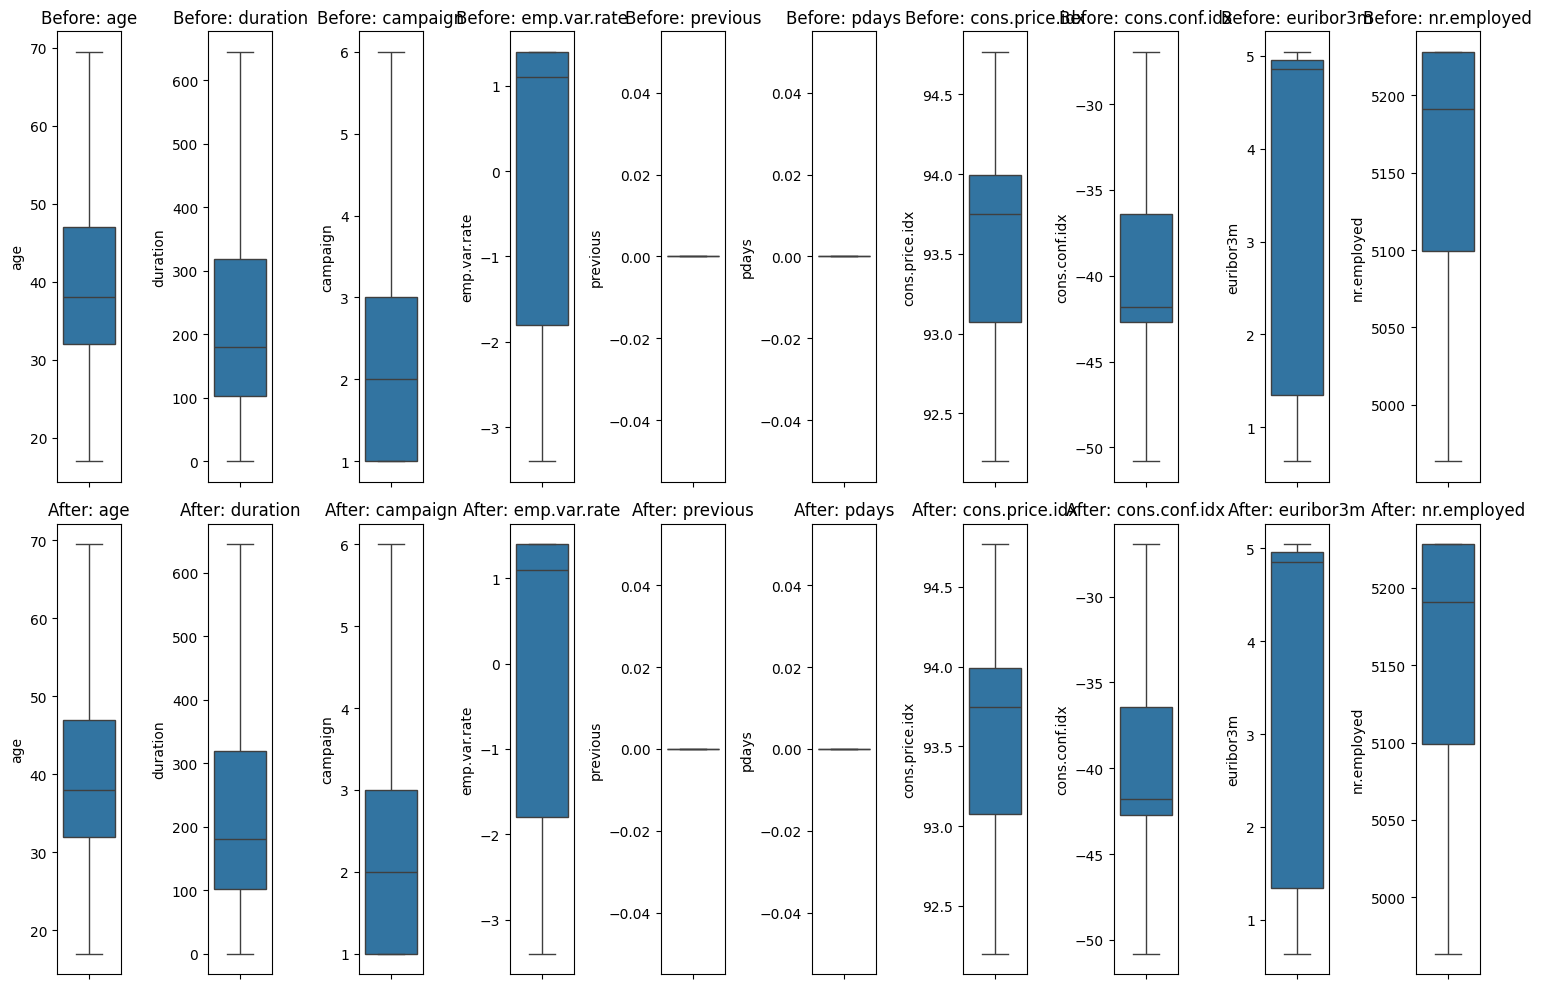

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for the box plots before and after outlier handling
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_columns), figsize=(15, 10))

# Plot box plots before outlier handling
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=data[column], ax=axes[0, i])
    axes[0, i].set_title(f'Before: {column}')

# Plot box plots after outlier handling
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=data[column], ax=axes[1, i])
    axes[1, i].set_title(f'After: {column}')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [112]:
# Save the updated data
output_path = os.path.join(google_drive_folder, "standardized_data.csv")
data.to_csv(output_path, index=False)

In [113]:
import pandas as pd

# Load the cleaned and transformed dataset
data_filtered = pd.read_csv(os.path.join(google_drive_folder, "standardized_data.csv"))

# Count the occurrences of each class in the target variable
class_counts = data_filtered['y'].value_counts()

# Print the class counts
print("Class Counts:")
print(class_counts)

# Calculate the class distribution as percentages
class_distribution = class_counts / class_counts.sum() * 100

# Print the class distribution
print("\nClass Distribution (%):")
print(class_distribution)

Class Counts:
y
0    36535
1     4639
Name: count, dtype: int64

Class Distribution (%):
y
0    88.733181
1    11.266819
Name: count, dtype: float64


In [114]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [115]:
import pandas as pd

y_resampled_series = pd.Series(y_resampled)

# Print class counts
class_counts = y_resampled_series.value_counts()
print("Class Counts:")
print(class_counts)

# Print class distribution (%)
class_distribution = y_resampled_series.value_counts(normalize=True) * 100
print("\nClass Distribution (%):")
print(class_distribution)

Class Counts:
y
0    36535
1    36535
Name: count, dtype: int64

Class Distribution (%):
y
0    50.0
1    50.0
Name: proportion, dtype: float64


In [116]:
import pandas as pd

# Assuming you have X_resampled and y_resampled after applying SMOTE

# Combine X_resampled and y_resampled into a single DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)  # Assuming X has column names
resampled_data['y'] = y_resampled  # Assuming 'income' is the y column name

# Save the resampled data to a CSV file
resampled_data.to_csv('resampled_data.csv', index=False)

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the cleaned and transformed dataset
data = pd.read_csv('resampled_data.csv')

# Define features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Split the data into training and testing sets (80% train, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (80% train, 20% validation of the train set)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Numerical columns to scale
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Scale numerical features using StandardScaler
scaler = StandardScaler()

# Fit scaler on the training data and transform training, validation, and testing sets
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Check the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_val)  # Evaluate on validation set

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier:")
print("Accuracy on Validation Set:", accuracy_score(y_val, rf_predictions))
print("Classification Report on Validation Set:")
print(classification_report(y_val, rf_predictions))

# Neural Network (MLP) Classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_classifier.fit(X_train, y_train)
nn_predictions = nn_classifier.predict(X_val)  # Evaluate on validation set

# Evaluate Neural Network Classifier
print("\nNeural Network (MLP) Classifier:")
print("Accuracy on Validation Set:", accuracy_score(y_val, nn_predictions))
print("Classification Report on Validation Set:")
print(classification_report(y_val, nn_predictions))

# Final evaluation on the test set (once you're happy with the models)
rf_test_predictions = rf_classifier.predict(X_test)
nn_test_predictions = nn_classifier.predict(X_test)

print("\nFinal Evaluation on Test Set:")

# Evaluate Random Forest on the test set
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_predictions))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_test_predictions))

# Evaluate Neural Network on the test set
print("Neural Network Test Accuracy:", accuracy_score(y_test, nn_test_predictions))
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_test_predictions))


Training set shape: (46764, 20), (46764,)
Validation set shape: (11692, 20), (11692,)
Testing set shape: (14614, 20), (14614,)

Random Forest Classifier:
Accuracy on Validation Set: 0.9459459459459459
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5814
           1       0.93      0.97      0.95      5878

    accuracy                           0.95     11692
   macro avg       0.95      0.95      0.95     11692
weighted avg       0.95      0.95      0.95     11692


Neural Network (MLP) Classifier:
Accuracy on Validation Set: 0.921228190215532
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      5814
           1       0.90      0.95      0.92      5878

    accuracy                           0.92     11692
   macro avg       0.92      0.92      0.92     11692
weighted avg       0.92      0.92     


Confusion Matrix for Random Forest Classifier:


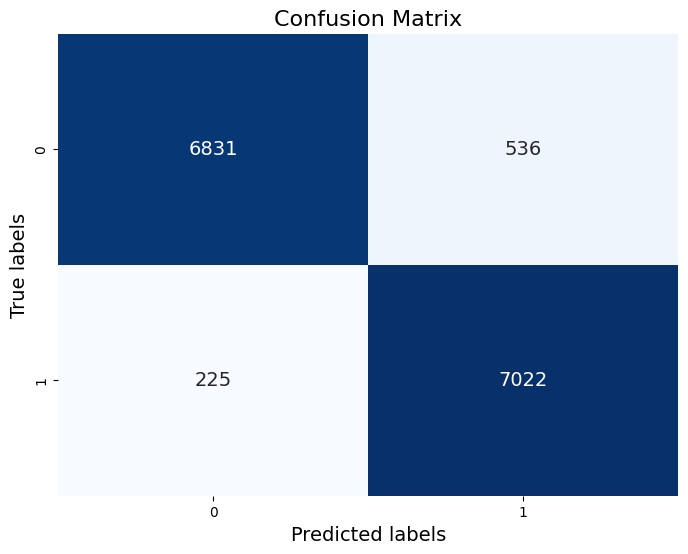


Confusion Matrix for Neural Network Classifier:


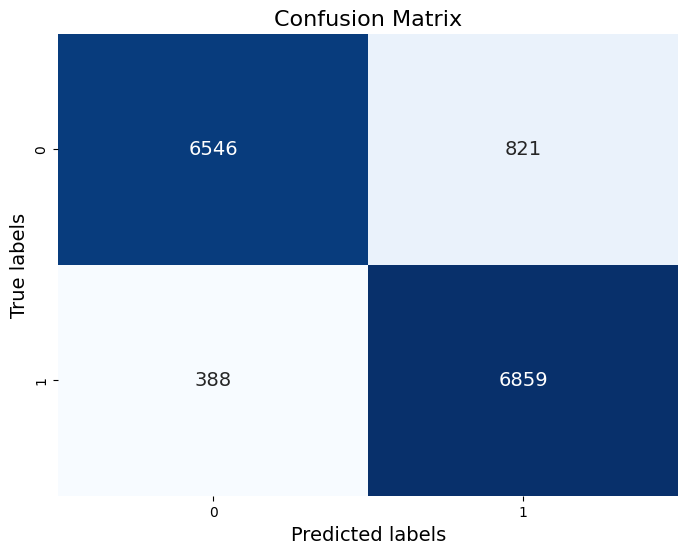

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the test set (X_test) for predictions
rf_predictions = rf_classifier.predict(X_test)
nn_predictions = nn_classifier.predict(X_test)

# Print Confusion Matrix for Random Forest Classifier
print("\nConfusion Matrix for Random Forest Classifier:")
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Print Confusion Matrix for Neural Network Classifier
print("\nConfusion Matrix for Neural Network Classifier:")
cm_nn = confusion_matrix(y_test, nn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [123]:
from sklearn.metrics import accuracy_score

# Neural Network Classifier
nn_train_predictions = nn_classifier.predict(X_train)
nn_train_accuracy = accuracy_score(y_train, nn_train_predictions)
print("Neural Network Classifier Training Accuracy:", nn_train_accuracy)

# Random Forest Classifier
rf_train_predictions = rf_classifier.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
print("Random Forest Training Accuracy:", rf_train_accuracy)

Neural Network Classifier Training Accuracy: 0.9291335215122744
Random Forest Training Accuracy: 0.9999358480882731
